In [1]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [2]:
#     * Bar graph: Top facilities with most serious deficiencies stacked JKL
#     * Bar graph: Top facilities with most fines
#     * Bar graph: Fines per year before and after Trump
#     * Map facilities:
#         * article: total deficiencies and fines
#         * headline: district

In [3]:
!ls

Barak_Obama_web-resized.jpg
Nursing Homes in Texas.ipynb
deficiencies_map.csv
deficiencies_map_geocodio_e212d459e3520bf84f61c724ff7f9aabb1e4bc7a.csv
deficienciescount.csv
deficiency_points.geojson
inspection reports per facility.csv
nursing homes penalties.csv
nursinghomes1.pdf
nursinghomes2.pdf
nursinghomes3.pdf
nursinghomes4.pdf
nursinghomes5.pdf
nursinghomescomplaintsfinal.pdf
nursinghomesdeficiencies.pdf
nursinghomesdeficienciesfinal.pdf
nursinghomesfinesfinal.pdf
nursinghomeshighestfinesfinal.pdf
tl_2016_48_cousub.shp
trumpface.png


In [4]:
df2 = pd.read_csv("inspection reports per facility.csv")

In [5]:
texas_deficiencies = df2[(df2['state'] == 'TX')]

In [6]:
texas_deficiencies.shape

(26840, 13)

In [7]:
texas_deficiencies.head()

,facility_name,facility_id,address,city,state,zip,inspection_date,deficiency_tag,scope_severity,complaint,standard,eventid,inspection_text
17739,PHP THE OAKS AT BEAUMONT,455001,4195 MILAM ST,BEAUMONT,TX,77707,12/08/2016,441,E,1,0,51U811,"><BR/>Based on observation, interview, and rec..."
17740,PHP THE OAKS AT BEAUMONT,455001,4195 MILAM ST,BEAUMONT,TX,77707,12/08/2016,498,E,1,0,51U811,**NOTE- TERMS IN BRACKETS HAVE BEEN EDITED TO ...
17741,PHP THE OAKS AT BEAUMONT,455001,4195 MILAM ST,BEAUMONT,TX,77707,04/26/2017,224,E,1,1,DHMS11,**NOTE- TERMS IN BRACKETS HAVE BEEN EDITED TO ...
17742,PHP THE OAKS AT BEAUMONT,455001,4195 MILAM ST,BEAUMONT,TX,77707,04/26/2017,226,E,1,1,DHMS11,**NOTE- TERMS IN BRACKETS HAVE BEEN EDITED TO ...
17743,PHP THE OAKS AT BEAUMONT,455001,4195 MILAM ST,BEAUMONT,TX,77707,04/26/2017,248,E,0,1,DHMS11,**NOTE- TERMS IN BRACKETS HAVE BEEN EDITED TO ...


In [8]:
deficiency_count = texas_deficiencies.pivot_table(columns=['scope_severity'],
                               index=['facility_name'],
                               aggfunc='count', fill_value=0)

In [9]:
deficiency_count = deficiency_count.drop(['address',
                                          'city',
                                          'state',
                                          'zip',
                                          'inspection_date',
                                          'deficiency_tag',
                                          'complaint', 
                                          'standard', 
                                          'inspection_text', 
                                          'inspection_date',
                                          'eventid'], axis=1)

In [10]:
deficiency_count.head()

facility_id                  \
scope_severity                                             B  C  D   E  F  G   
facility_name                                                                  
ACCEL AT COLLEGE STATION                                   0  0  1   1  1  0   
ACCEL AT WILLOW BEND                                       0  0  6   6  8  2   
ADVANCED HEALTH & REHAB CENTER OF GARLAND                  0  0  4  13  4  0   
ADVANCED REHABILITATION & HEALTHCARE OF LIVE OAK           0  1  2  39  3  0   
ADVANCED REHABILITATION AND HEALTHCARE OF BOWIE            0  1  0  10  3  0   

                                                                 
scope_severity                                    H  I  J  K  L  
facility_name                                                    
ACCEL AT COLLEGE STATION                          0  0  0  0  0  
ACCEL AT WILLOW BEND                              0  0  0  0  0  
ADVANCED HEALTH & REHAB CENTER OF GARLAND         0  0  0  0  0  
ADVANCED REHABILITATION & HEALTHCARE OF LIVE OAK  0  0  0  0  0  
ADVANCED REHABILITATION AND HEALTHCARE OF BOWIE   0  0  0  0  0

In [11]:
deficiency_count = deficiency_count['facility_id'].astype(str)

In [12]:
serious_deficiencies = deficiency_count.drop(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'], axis=1)

In [13]:
serious_deficiencies['K'] = serious_deficiencies['K'].astype(int)

In [14]:
serious_deficiencies['J'] = serious_deficiencies['J'].astype(int)

In [15]:
serious_deficiencies['L'] = serious_deficiencies['L'].astype(int)

In [16]:
serious_deficiencies['sum'] = serious_deficiencies['J'] + serious_deficiencies['K'] + serious_deficiencies['L']

In [17]:
most_deficiencies = serious_deficiencies[(serious_deficiencies['sum'] > 7)].sort_values(by='sum', ascending=False)

In [18]:
most_deficiencies = most_deficiencies.reset_index()

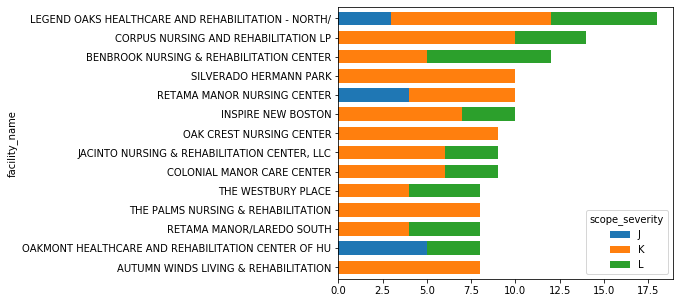

In [19]:
most_deficiencies.sort_values(by='sum').plot(x='facility_name', 
                                             y=['J', 'K', 'L'], 
                                             kind='barh',
                                             figsize=(6, 5),
                                             width=0.7,
                                             stacked=True, 
                                             title='')
plt.savefig('nursinghomes1.pdf')



In [20]:
!ls

Barak_Obama_web-resized.jpg
Nursing Homes in Texas.ipynb
deficiencies_map.csv
deficiencies_map_geocodio_e212d459e3520bf84f61c724ff7f9aabb1e4bc7a.csv
deficienciescount.csv
deficiency_points.geojson
inspection reports per facility.csv
nursing homes penalties.csv
nursinghomes1.pdf
nursinghomes2.pdf
nursinghomes3.pdf
nursinghomes4.pdf
nursinghomes5.pdf
nursinghomescomplaintsfinal.pdf
nursinghomesdeficiencies.pdf
nursinghomesdeficienciesfinal.pdf
nursinghomesfinesfinal.pdf
nursinghomeshighestfinesfinal.pdf
tl_2016_48_cousub.shp
trumpface.png


In [21]:
texas_fines = pd.read_csv("nursing homes penalties.csv")

In [22]:
texas_fines.head()

,provnum,provname,address,city,state,zip,pnlty_date,pnlty_type,fine_amt
0,455497,CREEKSIDE TERRACE REHABILITATION,1555 POWELL AVENUE,BELTON,TX,76513,1/2/15,Fine,5525
1,675056,STANTON NURSING AND REHABILITATION LP,1100 W BROADWAY,STANTON,TX,79782,1/8/15,Fine,7670
2,455678,SUMMER MEADOWS,301 HOLLYBROOK DR,LONGVIEW,TX,75605,1/15/15,Fine,1268
3,675501,HERITAGE OAKS WEST RETIREMENT VILLAGE,3300 W 2ND AVE,CORSICANA,TX,75110,1/15/15,Fine,1300
4,675793,BROOKHOLLOW HEIGHTS TRANSITIONAL CARE CENTER,1737 N LOOP W,HOUSTON,TX,77008,1/16/15,Fine,239655


In [23]:
most_fines = pd.DataFrame(texas_fines.provname.value_counts().head(14))

In [24]:
most_fines = most_fines.reset_index()

In [25]:
most_fines.head()

,index,provname
0,CROSS COUNTRY HEALTHCARE CENTER,7
1,OVERTON HEALTHCARE CENTER,7
2,LEXINGTON PLACE NURSING & REHABILITATION,7
3,KLEBERG COUNTY NURSING AND REHABILITATION LP,6
4,FREE STATE CRESTWOOD,6


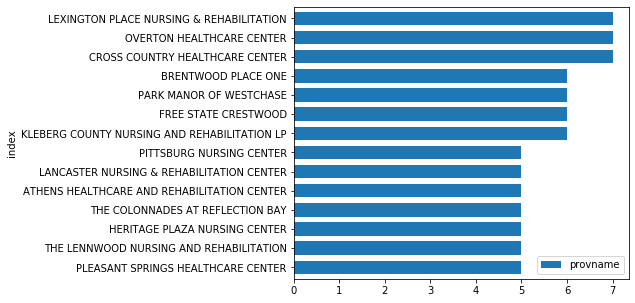

In [26]:
most_fines.sort_values(by='provname').plot(x='index',
                                           y='provname',
                                           kind='barh',
                                           figsize=(6, 5),
                                           width=0.7,
                                           title='')
plt.savefig('nursinghomes3.pdf')



In [27]:
texas_fines[(texas_fines['pnlty_date'].str.contains('^1/.*/14'))]

,provnum,provname,address,city,state,zip,pnlty_date,pnlty_type,fine_amt
190,675210,HERITAGE HOUSE NURSING AND REHABILITATION,407 N COLLEGE ST,ROSEBUD,TX,76570,1/10/14,Fine,1744
191,676220,GRANITE MESA HEALTH CENTER,1401 MAX COPELAND DR,MARBLE FALLS,TX,78654,1/10/14,Fine,3500
192,676220,GRANITE MESA HEALTH CENTER,1401 MAX COPELAND DR,MARBLE FALLS,TX,78654,1/10/14,Fine,2000
193,676052,IMMANUELS HEALTHCARE,4515 VILLAGE CREEK RD,FORT WORTH,TX,76119,1/11/14,Fine,115011
194,675939,VINTAGE HEALTH CARE CENTER,205 N BONNIE BRAE,DENTON,TX,76201,1/15/14,Fine,1300
195,675939,VINTAGE HEALTH CARE CENTER,205 N BONNIE BRAE,DENTON,TX,76201,1/15/14,Fine,1300
196,676004,THE HILLS NURSING & REHABILITATION,201 E THOMPSON ST,DECATUR,TX,76234,1/16/14,Fine,2600
197,675387,CARTHAGE LTC PARTNERS INC,501 COTTAGE RD,CARTHAGE,TX,75633,1/17/14,Fine,24050
198,675982,"PARK PLAZA LTC PARTNERS, INC.",2210 HOWARD ST,SAN ANGELO,TX,76901,1/17/14,Fine,4875
199,675553,THE HERITAGE NURSING HOME,1026 E GOODE ST,QUITMAN,TX,75783,1/22/14,Fine,5200


In [28]:
# texas_fines['month'] = texas_fines['pnlty_date'].str.extract(r'(\d+/)')

In [29]:
# texas_fines['year'] = texas_fines['pnlty_date'].replace(r'\d+/\d+/', '', regex=True)

In [30]:
# texas_fines['year'] = '20' + texas_fines['year']

In [31]:
# texas_fines['pnlty_date'] = texas_fines['month'] + texas_fines['year']

In [32]:
# texas_fines = texas_fines.drop(['month', 'year'], axis=1)

In [33]:
df = pd.DataFrame(columns=['2014 Q1', '2014 Q2', '2014 Q3', '2014 Q4', 
                           '2015 Q1', '2015 Q2', '2015 Q3', '2015 Q4',
                           '2016 Q1', '2016 Q2', '2016 Q3', '2016 Q4',
                           '2017 Q1', '2017 Q2', '2017 Q3', '2017 Q4',
                           '2018 Q1', '2018 Q2', '2018 Q3', '2018 Q4',], index=['0'])

In [34]:
df['2014 Q1'] = texas_fines[(texas_fines['pnlty_date'].str.contains('^[1,2,3]/.*/14'))]['fine_amt'].sum()

In [35]:
df['2014 Q2'] = texas_fines[(texas_fines['pnlty_date'].str.contains('^[4,5,6]/.*/14'))]['fine_amt'].sum()

In [36]:
df['2014 Q3'] = texas_fines[(texas_fines['pnlty_date'].str.contains('^[7,8,9]/.*/14'))]['fine_amt'].sum()

In [37]:
df['2014 Q4'] = texas_fines[(texas_fines['pnlty_date'].str.contains('^(10)/.*/14'))]['fine_amt'].sum() + texas_fines[(texas_fines['pnlty_date'].str.contains('^(11)/.*/14'))]['fine_amt'].sum() + texas_fines[(texas_fines['pnlty_date'].str.contains('^(12)/.*/14'))]['fine_amt'].sum()

/Users/elenamlutz/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [38]:
df['2015 Q1'] = texas_fines[(texas_fines['pnlty_date'].str.contains('^[1,2,3]/.*/15'))]['fine_amt'].sum()

In [39]:
df['2015 Q2'] = texas_fines[(texas_fines['pnlty_date'].str.contains('^[4,5,6]/.*/15'))]['fine_amt'].sum()

In [40]:
df['2015 Q3'] = texas_fines[(texas_fines['pnlty_date'].str.contains('^[7,8,9]/.*/15'))]['fine_amt'].sum()

In [41]:
df['2015 Q4'] = texas_fines[(texas_fines['pnlty_date'].str.contains('^(10)/.*/15'))]['fine_amt'].sum() + texas_fines[(texas_fines['pnlty_date'].str.contains('^(11)/.*/15'))]['fine_amt'].sum() + texas_fines[(texas_fines['pnlty_date'].str.contains('^(12)/.*/15'))]['fine_amt'].sum()

/Users/elenamlutz/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [42]:
df['2016 Q1'] = texas_fines[(texas_fines['pnlty_date'].str.contains('^[1,2,3]/.*/16'))]['fine_amt'].sum()

In [43]:
df['2016 Q2'] = texas_fines[(texas_fines['pnlty_date'].str.contains('^[4,5,6]/.*/16'))]['fine_amt'].sum()

In [44]:
df['2016 Q3'] = texas_fines[(texas_fines['pnlty_date'].str.contains('^[7,8,9]/.*/16'))]['fine_amt'].sum()

In [45]:
df['2016 Q4'] = texas_fines[(texas_fines['pnlty_date'].str.contains('^(10)/.*/16'))]['fine_amt'].sum() + texas_fines[(texas_fines['pnlty_date'].str.contains('^(11)/.*/16'))]['fine_amt'].sum() + texas_fines[(texas_fines['pnlty_date'].str.contains('^(12)/.*/16'))]['fine_amt'].sum()

/Users/elenamlutz/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [46]:
df['2017 Q1'] = texas_fines[(texas_fines['pnlty_date'].str.contains('^[1,2,3]/.*/17'))]['fine_amt'].sum()

In [47]:
df['2017 Q2'] = texas_fines[(texas_fines['pnlty_date'].str.contains('^[4,5,6]/.*/17'))]['fine_amt'].sum()

In [48]:
df['2017 Q3'] = texas_fines[(texas_fines['pnlty_date'].str.contains('^[7,8,9]/.*/17'))]['fine_amt'].sum()

In [49]:
df['2017 Q4'] = texas_fines[(texas_fines['pnlty_date'].str.contains('^(10)/.*/17'))]['fine_amt'].sum() + texas_fines[(texas_fines['pnlty_date'].str.contains('^(11)/.*/17'))]['fine_amt'].sum() + texas_fines[(texas_fines['pnlty_date'].str.contains('^(12)/.*/17'))]['fine_amt'].sum()

/Users/elenamlutz/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [50]:
df['2018 Q1'] = texas_fines[(texas_fines['pnlty_date'].str.contains('^[1,2,3]/.*/18'))]['fine_amt'].sum()

In [51]:
df['2018 Q2'] = texas_fines[(texas_fines['pnlty_date'].str.contains('^[4,5,6]/.*/18'))]['fine_amt'].sum()

In [52]:
df['2018 Q3'] = texas_fines[(texas_fines['pnlty_date'].str.contains('^[7,8,9]/.*/18'))]['fine_amt'].sum()

In [53]:
df['2018 Q4'] = texas_fines[(texas_fines['pnlty_date'].str.contains('^(10)/.*/18'))]['fine_amt'].sum() + texas_fines[(texas_fines['pnlty_date'].str.contains('^(11)/.*/18'))]['fine_amt'].sum() + texas_fines[(texas_fines['pnlty_date'].str.contains('^(12)/.*/18'))]['fine_amt'].sum()

/Users/elenamlutz/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [54]:
df['2019 Q1'] = texas_fines[(texas_fines['pnlty_date'].str.contains('^[1,2,3]/.*/19'))]['fine_amt'].sum()

In [55]:
df.head()

,2014 Q1,2014 Q2,2014 Q3,2014 Q4,2015 Q1,2015 Q2,2015 Q3,2015 Q4,2016 Q1,2016 Q2,...,2016 Q4,2017 Q1,2017 Q2,2017 Q3,2017 Q4,2018 Q1,2018 Q2,2018 Q3,2018 Q4,2019 Q1
0,863013,1005131,603364,606628,1344473,1396415,1391959,395146,1431867,1657746,...,738357,2496810,2083902,1552441,703071,1879890,1733863,847449,494067,501717


In [56]:
df = df.stack()

In [57]:
df=df.reset_index()

In [58]:
df=df.drop(['level_0'], axis=1)

In [59]:
df = df.rename(columns={'level_1': 'Quarter',
                        0: 'Total Fines'
                       })

In [60]:
df.head()

,Quarter,Total Fines
0,2014 Q1,863013
1,2014 Q2,1005131
2,2014 Q3,603364
3,2014 Q4,606628
4,2015 Q1,1344473


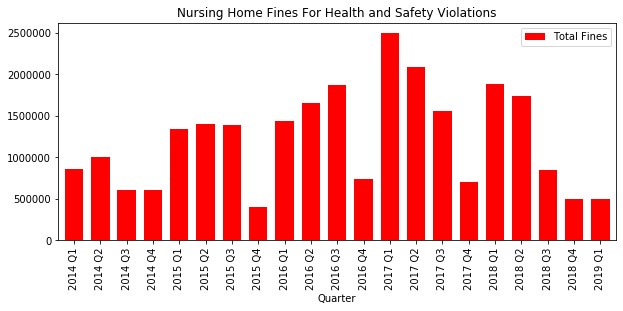

In [61]:
df.plot(x='Quarter',
        y=['Total Fines'],
        color='red',
        kind='bar',
        figsize=(10, 4),
        width=0.7,
        title='Nursing Home Fines For Health and Safety Violations')

plt.savefig('nursinghomes2.pdf')

In [62]:
texas_deficiencies.head()

,facility_name,facility_id,address,city,state,zip,inspection_date,deficiency_tag,scope_severity,complaint,standard,eventid,inspection_text
17739,PHP THE OAKS AT BEAUMONT,455001,4195 MILAM ST,BEAUMONT,TX,77707,12/08/2016,441,E,1,0,51U811,"><BR/>Based on observation, interview, and rec..."
17740,PHP THE OAKS AT BEAUMONT,455001,4195 MILAM ST,BEAUMONT,TX,77707,12/08/2016,498,E,1,0,51U811,**NOTE- TERMS IN BRACKETS HAVE BEEN EDITED TO ...
17741,PHP THE OAKS AT BEAUMONT,455001,4195 MILAM ST,BEAUMONT,TX,77707,04/26/2017,224,E,1,1,DHMS11,**NOTE- TERMS IN BRACKETS HAVE BEEN EDITED TO ...
17742,PHP THE OAKS AT BEAUMONT,455001,4195 MILAM ST,BEAUMONT,TX,77707,04/26/2017,226,E,1,1,DHMS11,**NOTE- TERMS IN BRACKETS HAVE BEEN EDITED TO ...
17743,PHP THE OAKS AT BEAUMONT,455001,4195 MILAM ST,BEAUMONT,TX,77707,04/26/2017,248,E,0,1,DHMS11,**NOTE- TERMS IN BRACKETS HAVE BEEN EDITED TO ...


In [63]:
texas_deficiencies['complaint'] = texas_deficiencies.complaint.replace({1: 'yes', 0: 'no'})

/Users/elenamlutz/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
texas_complaints = texas_deficiencies[(texas_deficiencies['complaint']=='yes')]

In [65]:
texas_complaints = pd.DataFrame(texas_complaints.facility_name.value_counts().head(15))

In [66]:
texas_complaints=texas_complaints.reset_index()

In [67]:
texas_complaints=texas_complaints.rename(columns={'index': 'provname',
                                                  'facility_name': 'complaints'})
texas_complaints.head()

,provname,complaints
0,KENNEDY HEALTH & REHAB,52
1,THE WESTBURY PLACE,50
2,BRIARCLIFF NURSING AND REHABILITATION CENTER,48
3,OAK PARK NURSING AND REHABILITATION CENTER,46
4,CHELSEA GARDENS,46


In [68]:
texas_complaints['provname'] = texas_complaints['provname'].str.strip()

In [69]:
texas_fines.head()

,provnum,provname,address,city,state,zip,pnlty_date,pnlty_type,fine_amt
0,455497,CREEKSIDE TERRACE REHABILITATION,1555 POWELL AVENUE,BELTON,TX,76513,1/2/15,Fine,5525
1,675056,STANTON NURSING AND REHABILITATION LP,1100 W BROADWAY,STANTON,TX,79782,1/8/15,Fine,7670
2,455678,SUMMER MEADOWS,301 HOLLYBROOK DR,LONGVIEW,TX,75605,1/15/15,Fine,1268
3,675501,HERITAGE OAKS WEST RETIREMENT VILLAGE,3300 W 2ND AVE,CORSICANA,TX,75110,1/15/15,Fine,1300
4,675793,BROOKHOLLOW HEIGHTS TRANSITIONAL CARE CENTER,1737 N LOOP W,HOUSTON,TX,77008,1/16/15,Fine,239655


In [70]:
most_fines = pd.DataFrame(texas_fines.groupby('provname').fine_amt.sum().sort_values(ascending=False).head(15))

In [71]:
most_fines = most_fines.reset_index()

In [72]:
most_fines.head()

,provname,fine_amt
0,LEGEND OAKS HEALTHCARE AND REHABILITATION - NORTH,547793
1,NORTH POINTE NURSING AND REHABILITATION LP,470615
2,RIDGEVIEW REHABILITATION AND SKILLED NURSING,371287
3,INSPIRE NEW BOSTON,355030
4,PITTSBURG NURSING CENTER,323529


In [73]:
most_fines['provname'] = most_fines['provname'].str.strip()

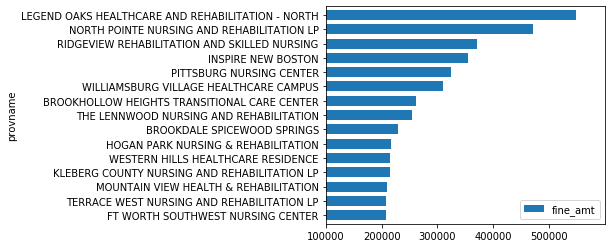

In [74]:
ax2 = most_fines.sort_values(by='fine_amt').plot(x='provname',
                      y='fine_amt',
                      kind='barh',
                      figsize=(5, 4),
                      width=0.7)
ax2.set_xticks([100000, 200000, 300000, 400000, 500000])
ax2.set_xlim(100000,600000)

plt.savefig('nursinghomes5.pdf')

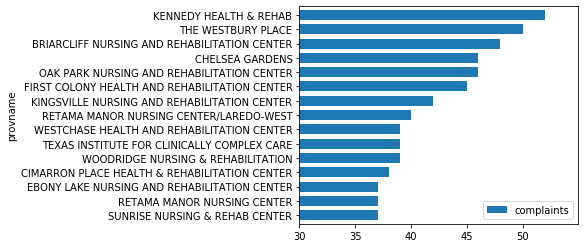

In [75]:
ax = texas_complaints.sort_values(by='complaints').plot(x='provname',
                      y='complaints',
                      kind='barh',
                      figsize=(5, 4),
                      width=0.7)
ax.set_xticks([30, 35, 40, 45, 50])
ax.set_xlim(30,55)

plt.savefig('nursinghomes4.pdf')

In [76]:
most_deficiencies = serious_deficiencies[(serious_deficiencies['sum'] > 5)].sort_values(by='sum', ascending=False)

In [77]:
most_deficiencies.to_csv('deficienciescount.csv')

In [80]:
df = pd.read_csv("deficienciescount1.csv")

In [81]:
df.head()

,facility_name,sum,patients,ratio
0,FREE STATE CRESTWOOD,6,7,85.7
1,LEGEND OAKS HEALTHCARE AND REHABILITATION - NO...,18,124,14.5
2,COPPERAS HOLLOW NURSING & REHABILITATION CENTER,7,51,13.7
3,SILVERADO HERMANN PARK,10,80,12.5
4,CORPUS NURSING AND REHABILITATION LP,14,114,12.3


In [83]:
texas_deficiencies.head()

,facility_name,facility_id,address,city,state,zip,inspection_date,deficiency_tag,scope_severity,complaint,standard,eventid,inspection_text
17739,PHP THE OAKS AT BEAUMONT,455001,4195 MILAM ST,BEAUMONT,TX,77707,12/08/2016,441,E,yes,0,51U811,"><BR/>Based on observation, interview, and rec..."
17740,PHP THE OAKS AT BEAUMONT,455001,4195 MILAM ST,BEAUMONT,TX,77707,12/08/2016,498,E,yes,0,51U811,**NOTE- TERMS IN BRACKETS HAVE BEEN EDITED TO ...
17741,PHP THE OAKS AT BEAUMONT,455001,4195 MILAM ST,BEAUMONT,TX,77707,04/26/2017,224,E,yes,1,DHMS11,**NOTE- TERMS IN BRACKETS HAVE BEEN EDITED TO ...
17742,PHP THE OAKS AT BEAUMONT,455001,4195 MILAM ST,BEAUMONT,TX,77707,04/26/2017,226,E,yes,1,DHMS11,**NOTE- TERMS IN BRACKETS HAVE BEEN EDITED TO ...
17743,PHP THE OAKS AT BEAUMONT,455001,4195 MILAM ST,BEAUMONT,TX,77707,04/26/2017,248,E,no,1,DHMS11,**NOTE- TERMS IN BRACKETS HAVE BEEN EDITED TO ...


In [85]:
texas_locations = texas_deficiencies.drop(['facility_id', 'inspection_date', 'deficiency_tag', 'scope_severity', 'complaint', 'standard', 'eventid', 'inspection_text'], axis=1)

In [88]:
texas_locations=texas_locations.drop_duplicates()

In [90]:
df = df.merge(texas_locations, left_on='facility_name', right_on='facility_name')

In [91]:
df.to_csv('csvforgeocodio.csv')